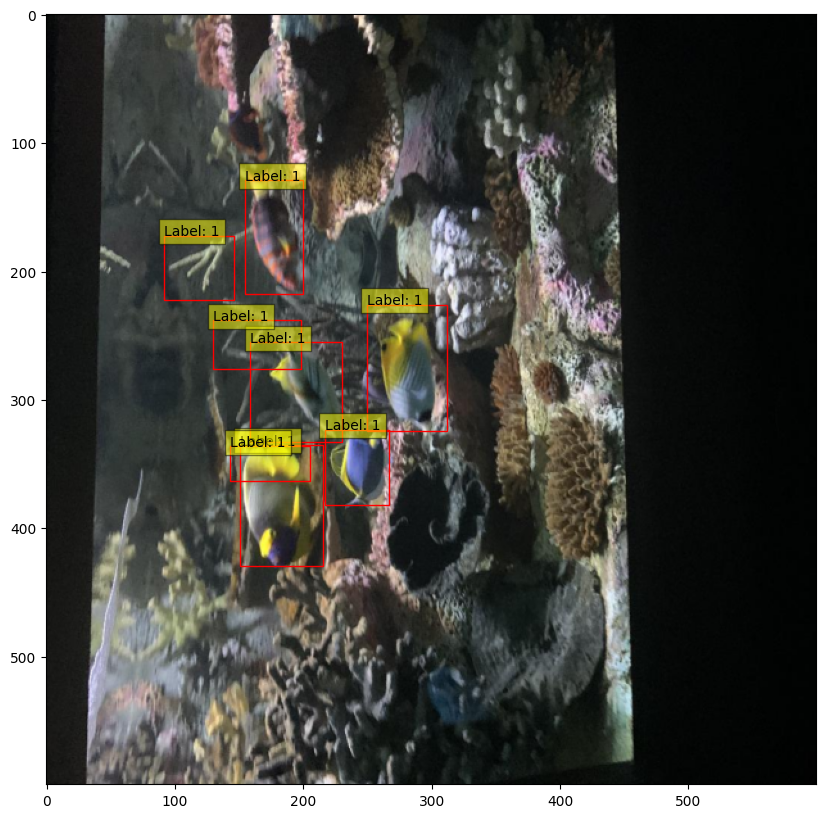

In [7]:
import torch
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Load the Pre-trained Model


def load_pretrained_model(num_classes, model_path):
    model = fasterrcnn_mobilenet_v3_large_fpn(pretrained=False)
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # Adjust num_classes to include the background class
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes + 1)

    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

# Step 2: Preprocess the Image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = T.Compose([
        T.Resize((600, 600)),
        T.ToTensor(),
    ])
    image = transform(image)
    return image

# Step 3: Visualization
def visualize_prediction(image, prediction, threshold=0.8):
    image = Image.fromarray(image.mul(255).permute(1, 2, 0).byte().numpy())
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for box, score, label in zip(prediction["boxes"], prediction["scores"], prediction["labels"]):
        if score > threshold:
            x, y, xmax, ymax = box
            width, height = xmax - x, ymax - y
            rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.text(x, y, f'Label: {label}', bbox=dict(facecolor='yellow', alpha=0.5))
    plt.show()

# Model Parameters
num_classes = 7  # Number of classes in the dataset
model_path = "model_epoch_9.pth"  # Path to the trained model weights
image_path = r"Aquarium Combined\test\IMG_8515_jpg.rf.98a9daca7c5a5bad9872bd7fb2d4f198.jpg"  # Path to the image for detection

# Load the model
model = load_pretrained_model(num_classes, model_path)

# Preprocess the image
img = preprocess_image(image_path)

# Perform detection
with torch.no_grad():
    prediction = model([img])

# Visualize the predictions
visualize_prediction(img, prediction[0])


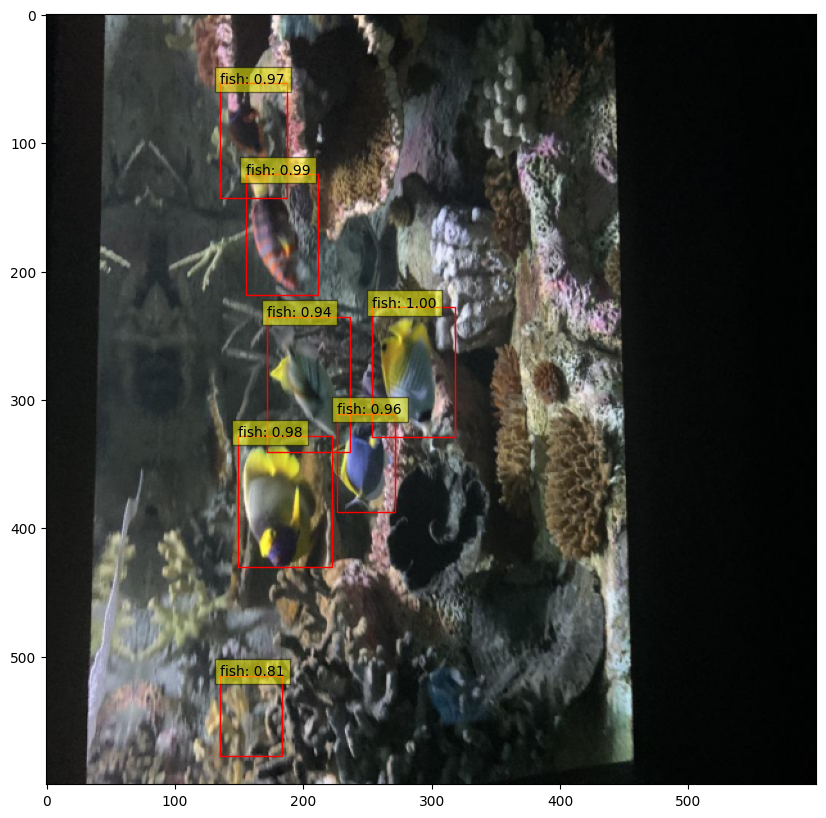

In [5]:
import torch
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the Pre-trained Model with Custom Number of Classes
def load_pretrained_model(num_classes, model_path):
    model = fasterrcnn_mobilenet_v3_large_fpn(pretrained=False)
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # Adjust the classifier for the number of classes
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes + 1)

    # Load the trained model weights
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

# Preprocess the Input Image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = T.Compose([
        T.Resize((600, 600)),
        T.ToTensor(),
    ])
    image = transform(image)
    return image

# Visualization Function
def visualize_prediction(image, prediction, threshold=0.8):
    image = Image.fromarray(image.mul(255).permute(1, 2, 0).byte().numpy())
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for box, score, label in zip(prediction["boxes"], prediction["scores"], prediction["labels"]):
        if score > threshold:
            x, y, xmax, ymax = box
            width, height = xmax - x, ymax - y
            rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            label_name = class_names[label]  # Map label ID to class name
            plt.text(x, y, f'{label_name}: {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))
    plt.show()

# Class Names List
class_names = [
    'background',  # Assuming a background class
    'fish',
    'jellyfish',
    'penguin',
    'puffin',
    'shark',
    'starfish',
    'stingray'
]

# Model Parameters
num_classes = 7  # Number of classes excluding background
model_path = "best_model_epoch_18.pth"  # Path to the model weights
image_path = r"Aquarium Combined\test\IMG_8515_jpg.rf.98a9daca7c5a5bad9872bd7fb2d4f198.jpg"  # Path to the input image

# Load the model
model = load_pretrained_model(num_classes, model_path)

# Preprocess the image
img = preprocess_image(image_path)

# Perform detection
with torch.no_grad():
    prediction = model([img])

# Visualize the predictions
visualize_prediction(img, prediction[0])
